In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
bitcoin = pd.read_csv(r'../data/Bitcoin Historical Data.csv')
binance = pd.read_csv(r'../data/BNB Historical Data.csv')
cardano = pd.read_csv(r'../data/Cardano Historical Data.csv')
ethereum = pd.read_csv(r'../data/Ethereum Historical Data.csv')
solana = pd.read_csv(r'../data/Solana Historical Data.csv')
xrp = pd.read_csv(r'../data/XRP Historical Data.csv')

In [78]:
dfs = [bitcoin, binance, cardano, ethereum, solana, xrp]

dates = [set(pd.to_datetime(df['Date'])) for df in dfs]

common = set.intersection(*dates)

if common:
    earliest = min(common)
    print(f'Earliest Date: {earliest}')
else:
    print("No common dates.")

Earliest Date: 2020-07-13 00:00:00


In [79]:
new_dfs = [
    df[pd.to_datetime(df['Date']) >= earliest].reset_index(drop=True) for df in dfs
]

In [81]:
assets = ['Bitcoin', 'Binance', 'Cardano', 'Ethereum', 'Solana', 'XRP']
prices = []

for i in range(len(assets)):
    if type(new_dfs[i]["Price"].iloc[0]) == str:
        new_dfs[i]["Price"] = new_dfs[i]["Price"].str.replace(",", "").astype(float)
    prices.append((new_dfs[i]).set_index('Date')['Price'].rename(assets[i]))

prices

[Date
 12/11/2024    101329.1
 12/10/2024     96600.3
 12/09/2024     97359.4
 12/08/2024    101115.8
 12/07/2024     99837.0
                 ...   
 07/17/2020      9155.8
 07/16/2020      9135.3
 07/15/2020      9198.7
 07/14/2020      9253.4
 07/13/2020      9243.6
 Name: Bitcoin, Length: 1613, dtype: float64,
 Date
 12/11/2024    711.12
 12/10/2024    676.92
 12/09/2024    690.02
 12/08/2024    741.84
 12/07/2024    749.46
                ...  
 07/17/2020     17.07
 07/16/2020     17.15
 07/15/2020     17.63
 07/14/2020     18.09
 07/13/2020     18.42
 Name: Binance, Length: 1613, dtype: float64,
 Date
 12/11/2024    1.0884
 12/10/2024    1.0216
 12/09/2024    1.0068
 12/08/2024    1.1933
 12/07/2024    1.2105
                ...  
 07/17/2020    0.1222
 07/16/2020    0.1260
 07/15/2020    0.1306
 07/14/2020    0.1324
 07/13/2020    0.1244
 Name: Cardano, Length: 1613, dtype: float64,
 Date
 12/11/2024    3825.29
 12/10/2024    3628.94
 12/09/2024    3718.98
 12/08/2024    4002.9

In [82]:
combine_prices = pd.concat(prices, axis=1)
combine_prices

,Bitcoin,Binance,Cardano,Ethereum,Solana,XRP
Date,,,,,,
12/11/2024,101329.1,711.12,1.0884,3825.29,228.356,2.4346
12/10/2024,96600.3,676.92,1.0216,3628.94,213.680,2.3715
12/09/2024,97359.4,690.02,1.0068,3718.98,217.012,2.2191
12/08/2024,101115.8,741.84,1.1933,4002.91,237.097,2.6037
12/07/2024,99837.0,749.46,1.2105,3996.24,238.379,2.4936
...,...,...,...,...,...,...
07/17/2020,9155.8,17.07,0.1222,232.75,NaN,0.1945
07/16/2020,9135.3,17.15,0.1260,233.65,NaN,0.1944
07/15/2020,9198.7,17.63,0.1306,238.62,1.383,0.1972


In [83]:
combine_prices.isnull().sum()

Bitcoin     0
Binance     0
Cardano     0
Ethereum    0
Solana      7
XRP         1
dtype: int64

In [84]:
cleaned_prices = combine_prices.dropna()
cleaned_prices.isnull().sum()

Bitcoin     0
Binance     0
Cardano     0
Ethereum    0
Solana      0
XRP         0
dtype: int64

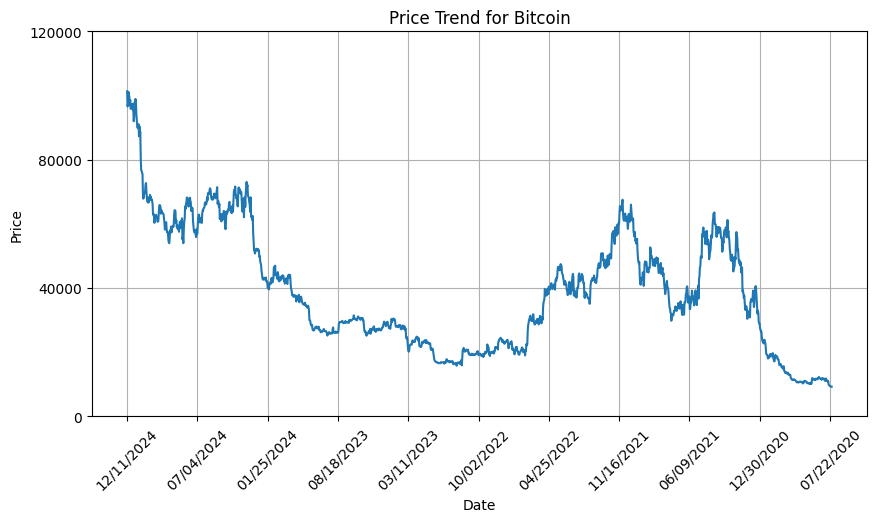

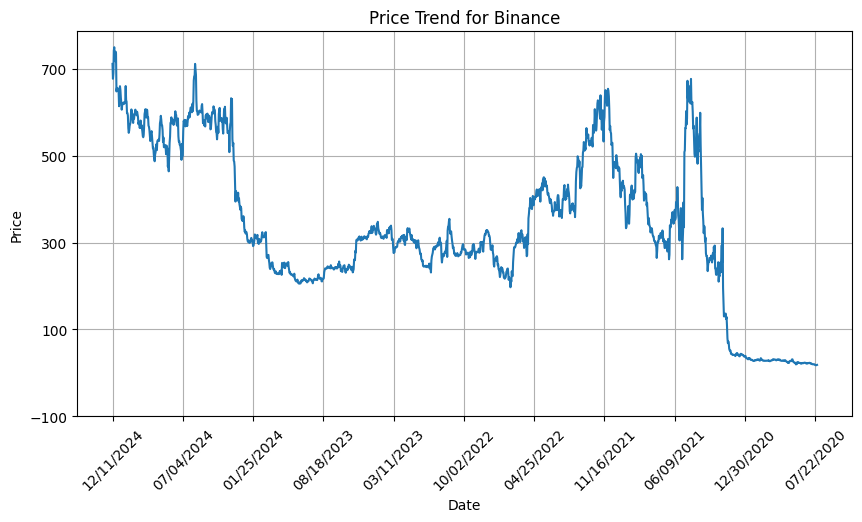

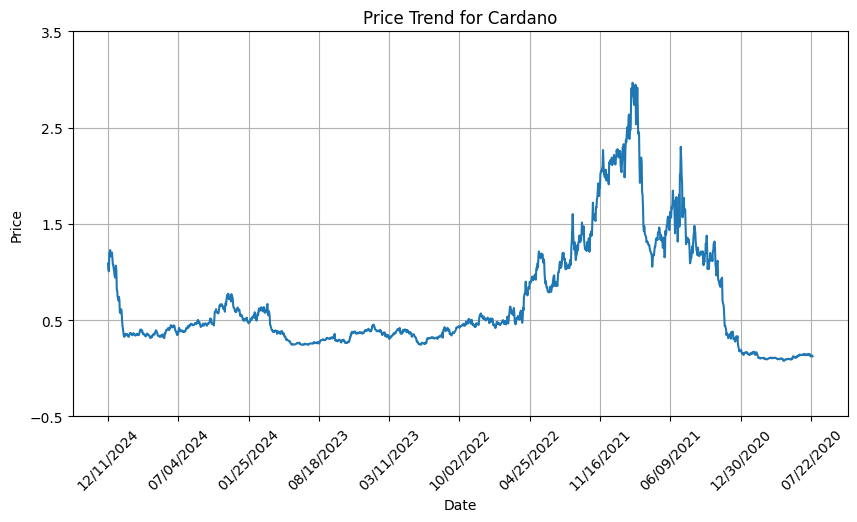

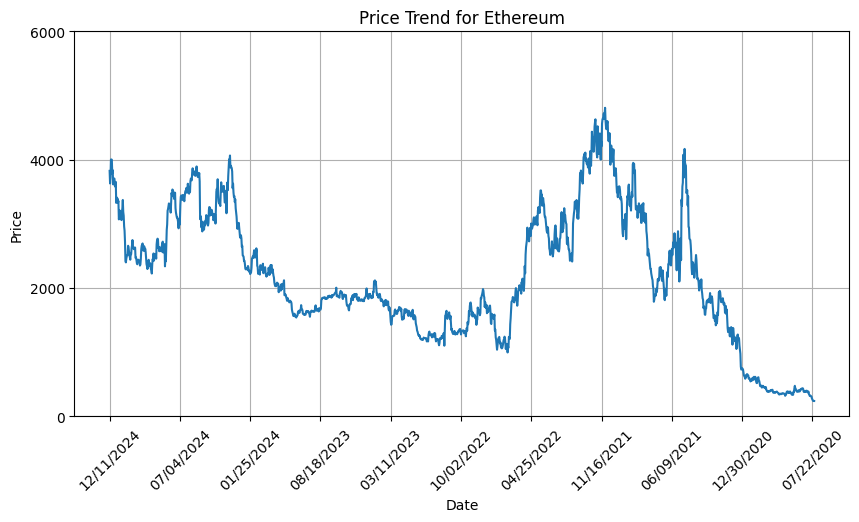

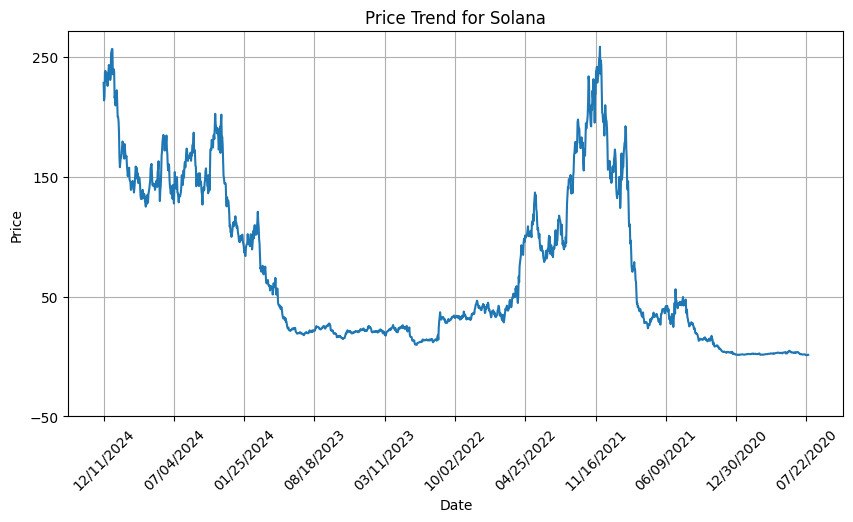

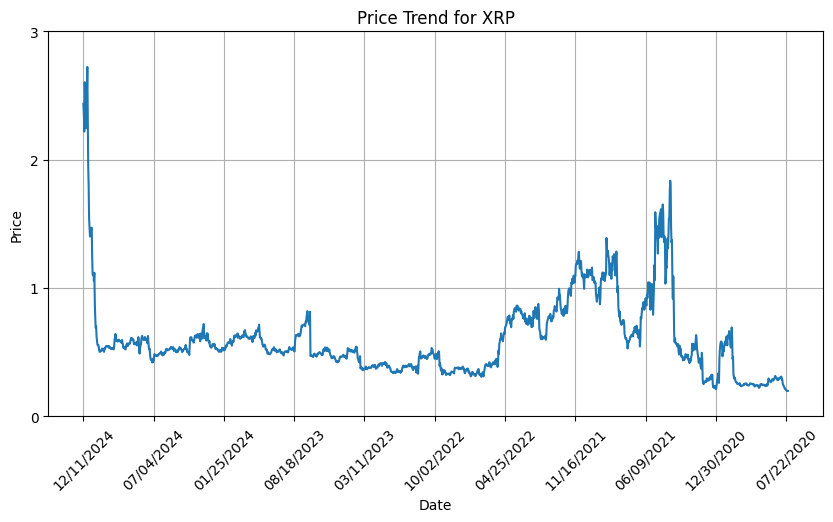

In [85]:
for col in cleaned_prices.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(cleaned_prices[col])
    
    x_ticks = cleaned_prices.index[::len(cleaned_prices) // 10]
    plt.xticks(x_ticks, rotation=45)
    
    y_ticks = plt.yticks()[0] 
    plt.yticks(y_ticks[::2])
    
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(f"Price Trend for {col}")
    plt.grid(True)
    plt.show()



In [86]:
cleaned_prices.to_csv('Historical Crypto Prices')